In [6]:
import matplotlib.pyplot as plt
import pickle

In [62]:
import sys

# Append the directory containing the src folder to sys.path
sys.path.append('/Users/lars/Documents/test/')

In [7]:
file_path = {
    "HELPDESK": "/Users/lars/Documents/test/models/models_pretrained2/histories/dynamic_bert_helpdesk_history.pkl",
    "BPIC2012": "/Users/lars/Documents/test/models/models_pretrained2/histories/dynamic_bert_bpic2012_history.pkl",
    "BPIC2018": "/Users/lars/Documents/test/models/models_pretrained2/histories/dynamic_bert_bpic2018_history.pkl",
    "TUNED_HELPDESK": "/Users/lars/Documents/test/models/models_pretrained2/histories/tuned_dynamic_bert_helpdesk_history.pk",
    "TUNED_BPIC2012": "/Users/lars/Documents/test/models/models_pretrained2/histories/tuned_dynamic_bert_bpic2012_history.pk",
    "TUNED_BPIC2018": "/Users/lars/Documents/test/models/models_pretrained2/histories/tuned_dynamic_bert_bpic2018_history.pk"
}

In [8]:
histories = dict()

In [9]:
for key, value in file_path.items():
    with open(value, 'rb') as file:
        histories[key] = pickle.load(file)

In [59]:
def comparison_tuned(dataset):
    dataset = dataset
    tuned_dataset = "TUNED_"+dataset

    # Get Loss and Accuracy for not tuned BERT model
    loss = histories[dataset]['loss']
    accuracy = histories[dataset]["accuracy"]
    val_loss = histories[dataset]['val_loss']
    val_accuracy = histories[dataset]["val_accuracy"]

    # Get Loss and Accuracy for tuned BERT model
    tuned_loss = histories[tuned_dataset]['loss']
    tuned_accuracy = histories[tuned_dataset]["accuracy"]
    tuned_val_loss = histories[tuned_dataset]['val_loss']
    tuned_val_accuracy = histories[tuned_dataset]["val_accuracy"]

    fig, axs = plt.subplots(1, 2, figsize=(15, 5))
    epochs = list(range(1, 6))
    # Plot train val Loss
    axs[0].plot(epochs, loss, label = "Not Tuned Loss", linestyle = "-", color = "black")
    axs[0].plot(epochs, tuned_loss, label= "Tuned Loss", linestyle = "-", color = "blue")
    axs[0].plot(epochs, val_loss, label = "Not Tuned Val Loss", linestyle = "--", color = "black")
    axs[0].plot(epochs, tuned_val_loss, label = "Tuned Val Loss", linestyle = "--", color = "blue")
    axs[0].set_xlabel("Epochs")
    axs[0].set_ylabel("Loss")
    axs[0].legend(['Not Tuned', 'Tuned'])
    axs[0].grid(True)
    axs[0].set_title(f"Tuned vs Not Tuned Loss for {dataset}")

    # Plot train val accuracy
    axs[1].plot(epochs, accuracy, label = "Not Tuned Accuracy", linestyle = "-", color = "black")
    axs[1].plot(epochs, tuned_accuracy, label = "Tuned Accuracy", linestyle = "-", color = "blue")
    axs[1].plot(epochs, val_accuracy, label = "Not Tuned Val Accuracy", linestyle = "--", color = "black")
    axs[1].plot(epochs, tuned_val_accuracy, label = "Tuned Val Accuracy", linestyle = "--", color = "blue")
    axs[1].set_xlabel("Epochs")
    axs[1].set_ylabel("Accuracy")
    axs[1].legend(["Not Tuned", "Tuned"])
    axs[1].grid(True)
    axs[1].set_title(f"Tuned vs Not Tuned Accuracy for {dataset}")

    plt.show()



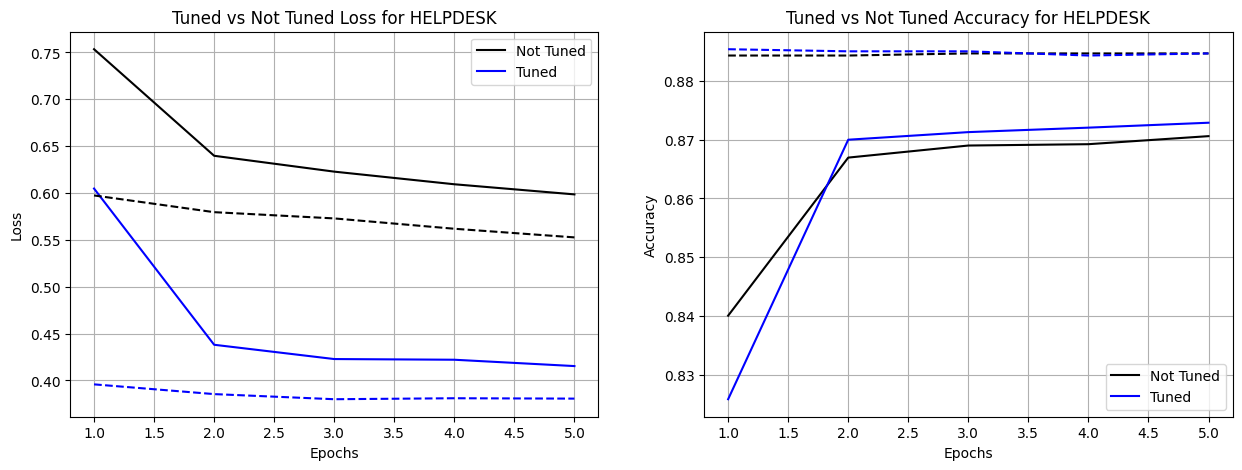

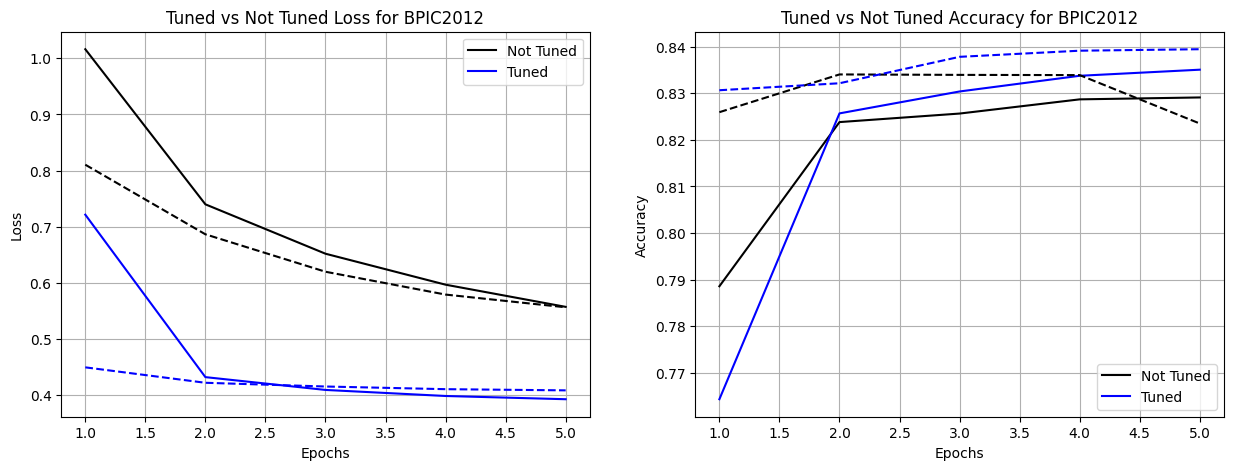

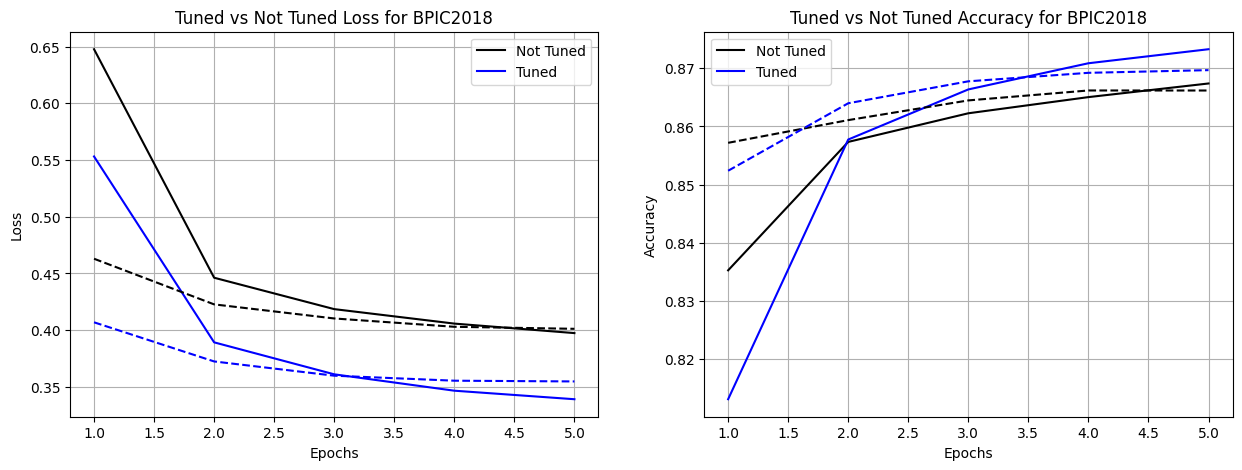

In [60]:
datasets = ["HELPDESK", "BPIC2012", "BPIC2018"]

for i in datasets:
    comparison_tuned(i)

In [63]:
from src.visualization.evaluation import calculate_average_metrics, plot_average_metrics

/Users/lars/Documents/test/venv/lib/python3.10/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [107]:
def calculate_average_metrics(results_dict, datasets):
    '''
    Calculates average metrics (loss and accuracy) across multiple datasets for each epoch.

    Input:
        - results_dict: dict - A dictionary containing the training history
        - model_type: str - The type of model to calculate the metrics for.
        - datasets: list - A list of dataset names to calculate the average metrics for.

    Output:
        - tuple: A tuple containing lists of average static and dynamic train/validation losses and accuracies.
    '''

    # Initialize lists to hold average metrics for each epoch
    avg_loss = []
    avg_val_loss = []
    avg_tuned_loss = []
    avg_tuned_val_loss = []
    avg_accuracy = []
    avg_val_accuracy = []
    avg_tuned_accuracy = []
    avg_tuned_val_accuracy = []
    
    # Get the number of epochs
    
    for epoch in range(5):
        total_loss = 0
        total_val_loss = 0
        total_tuned_loss = 0
        total_tuned_val_loss = 0
        total_accuracy = 0
        total_val_accuracy = 0
        total_tuned_accuracy = 0
        total_tuned_val_accuracy = 0
        count = 0 
        
        for dataset in datasets:
            #key = datasets
            tuned_key = f'TUNED_{dataset}'
            print("KEY: ", dataset)
            print("Epoch: ", epoch)
            print("Tuned Key: ", tuned_key)
            # Sum metrics for static and dynamic models across datasets for the current epoch
            total_loss += results_dict[dataset]['loss'][epoch]
            total_val_loss += results_dict[dataset]['val_loss'][epoch]
            total_tuned_loss += results_dict[tuned_key]['loss'][epoch]
            total_tuned_val_loss += results_dict[tuned_key]['val_loss'][epoch]
            
            total_accuracy += results_dict[dataset]['accuracy'][epoch]
            total_val_accuracy += results_dict[dataset]['val_accuracy'][epoch]
            total_tuned_accuracy += results_dict[tuned_key]['accuracy'][epoch]
            total_tuned_val_accuracy += results_dict[tuned_key]['val_accuracy'][epoch]
            print("Total Loss: ", total_loss)
            print("Total Tuned Acc: ", total_tuned_accuracy)
            count += 1
        
        # Calculate average metrics for the current epoch
        avg_loss.append(total_loss / count)
        avg_val_loss.append(total_val_loss / count)
        avg_tuned_loss.append(total_tuned_loss / count)
        avg_tuned_val_loss.append(total_tuned_val_loss / count)
        
        avg_accuracy.append(total_accuracy / count)
        avg_val_accuracy.append(total_val_accuracy / count)
        avg_tuned_accuracy.append(total_tuned_accuracy / count)
        avg_tuned_val_accuracy.append(total_tuned_val_accuracy / count)
    
    return (avg_loss, avg_val_loss, avg_tuned_loss, avg_tuned_val_loss,
            avg_accuracy, avg_val_accuracy, avg_tuned_accuracy, avg_tuned_val_accuracy)

In [108]:
def plot_average_metrics(results_dict, datasets):

    # Calculate average metrics using the helper function
    (avg_loss, avg_val_loss, avg_tuned_loss, avg_tuned_val_loss,
     avg_accuracy, avg_val_accuracy, avg_tuned_accuracy, avg_tuned_val_accuracy) = calculate_average_metrics(results_dict, datasets)
    
    # Create a list of epochs
    epochs = list(range(1, 6))  
    
    # Create a figure with two subplots
    fig, axs = plt.subplots(1, 2, figsize=(15, 6))  
    
    # Plot average loss
    axs[0].plot(epochs, avg_loss, label= "Avg Train Loss", linestyle='-', color='black')
    axs[0].plot(epochs, avg_val_loss, label="Avg Val Loss", linestyle='--', color='black')
    axs[0].plot(epochs, avg_tuned_loss, label='Avg Tuned Train Loss', linestyle='-', color='blue')
    axs[0].plot(epochs, avg_tuned_val_loss, label='Avg Tuned Val Loss', linestyle='--', color='blue')
    axs[0].set_title(f'Average Tuned Loss vs Not Tuned Loss - Across All Datasets')
    axs[0].set_xlabel('Epochs')
    axs[0].set_ylabel('Loss')
    axs[0].set_xticks(epochs)
    axs[0].legend()
    axs[0].grid(True)
    
    # Plot average accuracy
    axs[1].plot(epochs, avg_accuracy, label=f'Avg Train Accuracy', linestyle='-', color='black')
    axs[1].plot(epochs, avg_val_accuracy, label=f'Avg Val Accuracy', linestyle='--', color='black')
    axs[1].plot(epochs, avg_tuned_accuracy, label='Avg Tuned Train Accuracy', linestyle='-', color='blue')
    axs[1].plot(epochs, avg_tuned_val_accuracy, label=f'Avg Tuned Val Accuracy', linestyle='--', color='blue')
    axs[1].set_title(f'Average Tuned Accuracy vs Not Tuned Accuracy - Across All Datasets')
    axs[1].set_xlabel('Epochs')
    axs[1].set_ylabel('Accuracy')
    axs[1].set_xticks(epochs)
    axs[1].legend()
    axs[1].grid(True)
    
    plt.tight_layout()
    plt.show()

In [109]:
for epoch in range(5):
    print(epoch)

0
1
2
3
4


KEY:  HELPDESK
Epoch:  0
Tuned Key:  TUNED_HELPDESK
Total Loss:  0.7533858418464661
Total Tuned Acc:  0.8258657455444336
KEY:  BPIC2012
Epoch:  0
Tuned Key:  TUNED_BPIC2012
Total Loss:  1.7695301175117493
Total Tuned Acc:  1.5902472138404846
KEY:  BPIC2018
Epoch:  0
Tuned Key:  TUNED_BPIC2018
Total Loss:  2.4171656370162964
Total Tuned Acc:  2.403324842453003
KEY:  HELPDESK
Epoch:  1
Tuned Key:  TUNED_HELPDESK
Total Loss:  0.6396942138671875
Total Tuned Acc:  0.8699749112129211
KEY:  BPIC2012
Epoch:  1
Tuned Key:  TUNED_BPIC2012
Total Loss:  1.3796333074569702
Total Tuned Acc:  1.6956396102905273
KEY:  BPIC2018
Epoch:  1
Tuned Key:  TUNED_BPIC2018
Total Loss:  1.8258640468120575
Total Tuned Acc:  2.5533878803253174
KEY:  HELPDESK
Epoch:  2
Tuned Key:  TUNED_HELPDESK
Total Loss:  0.6227715015411377
Total Tuned Acc:  0.8712668418884277
KEY:  BPIC2012
Epoch:  2
Tuned Key:  TUNED_BPIC2012
Total Loss:  1.2747588157653809
Total Tuned Acc:  1.7016290426254272
KEY:  BPIC2018
Epoch:  2
Tuned Ke

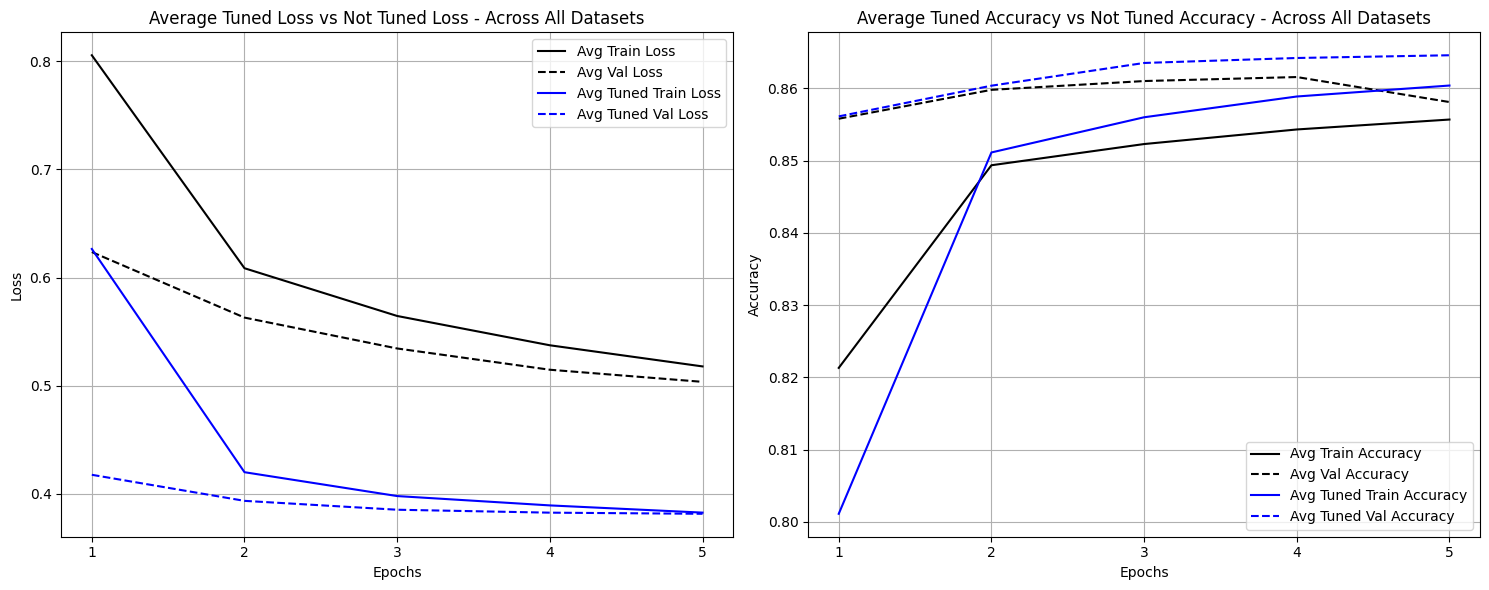

In [110]:
datasets = ["HELPDESK", "BPIC2012", "BPIC2018"]
plot_average_metrics(histories, datasets)

In [118]:
(0.8669351935386658 + 0.823799192905426 + 0.8573390245437622)/3

0.849357803662618

In [111]:
histories

{'HELPDESK': {'loss': [0.7533858418464661,
   0.6396942138671875,
   0.6227715015411377,
   0.60930335521698,
   0.5984966158866882],
  'accuracy': [0.8400668501853943,
   0.8669351935386658,
   0.8689870238304138,
   0.8692150115966797,
   0.8705828785896301],
  'precision': [0.9702333211898804,
   0.9746530055999756,
   0.9739855527877808,
   0.9737448692321777,
   0.9741041660308838],
  'recall': [0.9454188942909241,
   0.9503726959228516,
   0.9507794976234436,
   0.9520869851112366,
   0.951937198638916],
  'f1_score': [0.9576653838157654,
   0.9623596668243408,
   0.962242603302002,
   0.9627940654754639,
   0.9628930687904358],
  'val_loss': [0.5973713994026184,
   0.5795280933380127,
   0.5728614926338196,
   0.5618351697921753,
   0.5526202917098999],
  'val_accuracy': [0.8842856884002686,
   0.8842856884002686,
   0.8846428394317627,
   0.8846428394317627,
   0.8846428394317627],
  'val_precision': [0.9755409359931946,
   0.9755294322967529,
   0.9755638837814331,
   0.975552